# Experiment - NumPy neural network vs PyTorch neural network


In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from necessary_functions import (gradient_descent, forward_prop, get_accuracy, get_predictions, visualize_samples, PyTorchModel, train_pytorch_model, evaluate_numpy_model, evaluate_pytorch_model,  plot_heatmap)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


First I will set the seed for reproducibility

In [2]:
np.random.seed(42)
torch.manual_seed(42)

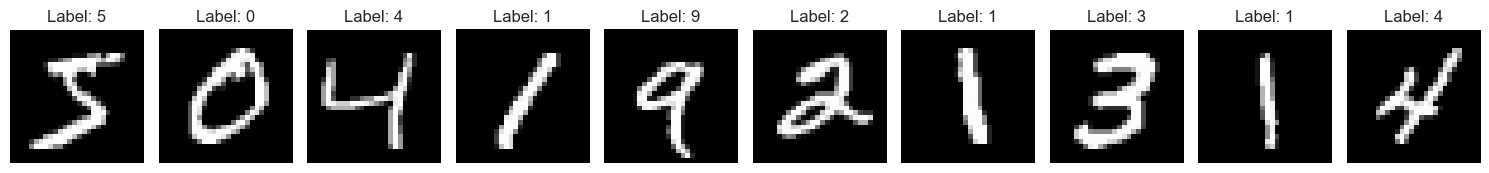

Train Set: (60000, 784), Test Set: (10000, 784)


In [3]:
#defining transformation: Convert image to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  #normalizing pixel values to [-1,1] for PyTorch
])

#loading the dataset
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)

#creating DataLoader for PyTorch training
batch_size = 64 # Set batch size
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#converting MNIST dataset to NumPy format for NumPy-based network
X_train_np = train_dataset.data.numpy().reshape(-1, 784) / 255.0  
Y_train_np = train_dataset.targets.numpy()

X_test_np = test_dataset.data.numpy().reshape(-1, 784) / 255.0  
Y_test_np = test_dataset.targets.numpy()

visualize_samples(train_dataset, num_samples=10)

print(f"Train Set: {X_train_np.shape}, Test Set: {X_test_np.shape}")

In [4]:
pytorch_model = PyTorchModel()
pytorch_accuracies = train_pytorch_model(pytorch_model, train_loader, 500)

PyTorch Model - Epoch 0, Accuracy: 0.6265
PyTorch Model - Epoch 100, Accuracy: 0.8706
PyTorch Model - Epoch 200, Accuracy: 0.8753
PyTorch Model - Epoch 300, Accuracy: 0.8776
PyTorch Model - Epoch 400, Accuracy: 0.8782


In [6]:

W1, b1, W2, b2 = gradient_descent(X_train_np.T, Y_train_np, 0.1, 500)


Iteration 0 - Accuracy: 0.1575
Iteration 100 - Accuracy: 0.5821
Iteration 200 - Accuracy: 0.7230
Iteration 300 - Accuracy: 0.7735
Iteration 400 - Accuracy: 0.8066


NumPy Model Test Accuracy: 0.8341
PyTorch Model Test Accuracy: 0.8527


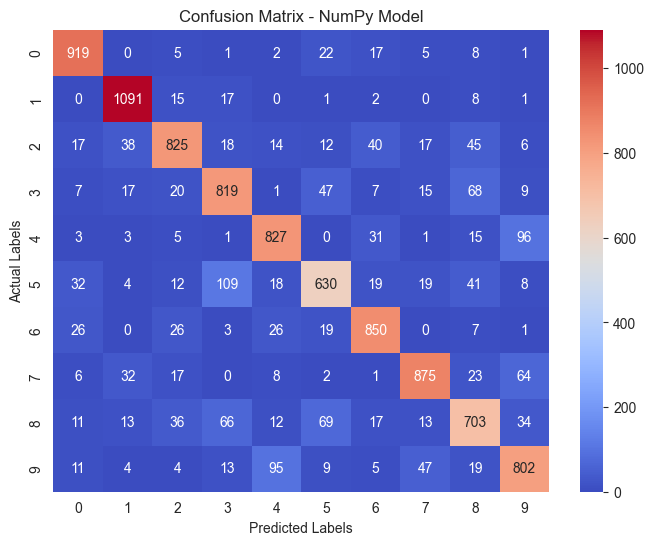

Classification Report for NumPy Model:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       980
           1       0.91      0.96      0.93      1135
           2       0.85      0.80      0.83      1032
           3       0.78      0.81      0.80      1010
           4       0.82      0.84      0.83       982
           5       0.78      0.71      0.74       892
           6       0.86      0.89      0.87       958
           7       0.88      0.85      0.87      1028
           8       0.75      0.72      0.74       974
           9       0.78      0.79      0.79      1009

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000


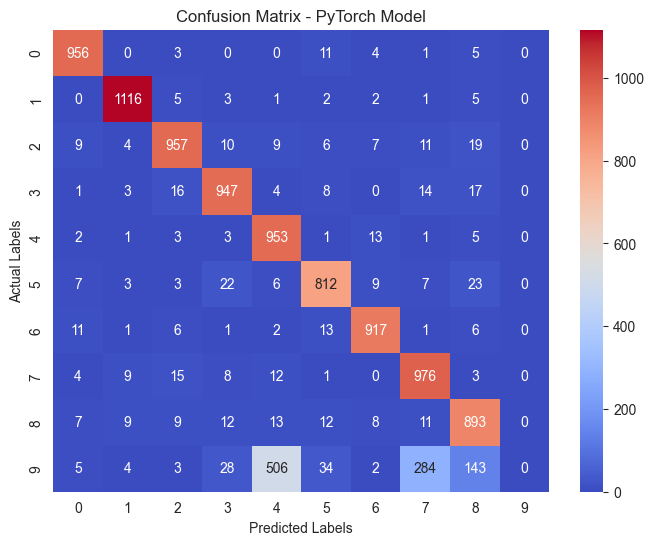

Classification Report for PyTorch Model:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.93      0.93      1032
           3       0.92      0.94      0.93      1010
           4       0.63      0.97      0.77       982
           5       0.90      0.91      0.91       892
           6       0.95      0.96      0.96       958
           7       0.75      0.95      0.84      1028
           8       0.80      0.92      0.85       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.85     10000
   macro avg       0.78      0.85      0.81     10000
weighted avg       0.78      0.85      0.81     10000


/Users/janburakowski/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/janburakowski/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/janburakowski/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [14]:
#evaluate NumPy Model
numpy_test_accuracy, numpy_predictions = evaluate_numpy_model(W1, b1, W2, b2, X_test_np, Y_test_np)

#evaluate PyTorch Model
pytorch_test_accuracy, pytorch_predictions, pytorch_labels = evaluate_pytorch_model(pytorch_model, test_loader)

#plot Heatmaps
plot_heatmap(Y_test_np, numpy_predictions, model_name="NumPy Model")
plot_heatmap(pytorch_labels, pytorch_predictions, model_name="PyTorch Model")

